<a href="https://colab.research.google.com/github/BlackUBird/TMCIT_T5DSP/blob/main/T5_DSP_21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [173]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft , ifft , fftfreq



In [174]:
sec = 1.0

f = 2.5
fs = 1000
t = np.arange( 0 , sec , 1/fs )
x = np.cos( 2*np.pi*f*t )

fs2 = 32
t2 = np.arange( 0 , sec , 1/fs2 )
x_sample = np.cos( 2*np.pi*f*t2 )


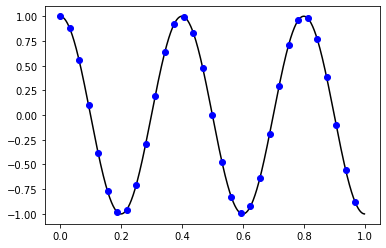

In [175]:
# 1000等分
plt.plot( t , x , color="k" )
# 32等分
plt.plot( t2 , x_sample , "bo" )



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  after removing the cwd from sys.path.


<StemContainer object of 3 artists>

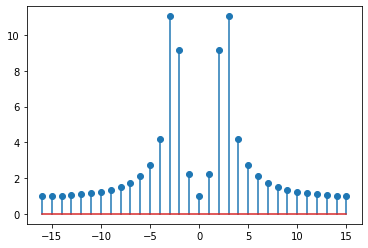

In [176]:
# フーリエ変換
X_sample = fft( x_sample )
freqs = fftfreq( len( X_sample ) , d = 1.0/fs2 )
plt.stem( freqs , np.abs( X_sample )  )



In [177]:
# ハミング窓を用意
N = fs2
n = np.arange( N )
wn = 0.5 - 0.5 * np.cos( 2*np.pi*(n+0.5)/N )
Wn = fft( wn )



In [178]:
print( len(wn) )
print( len(x_sample) )

32
32


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  after removing the cwd from sys.path.


<StemContainer object of 3 artists>

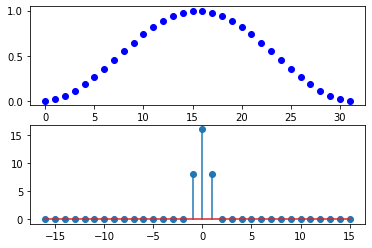

In [179]:
plt.subplot( 2 , 1 , 1 )
plt.plot( n , wn , "bo" )
plt.subplot( 2 , 1 , 2 )
plt.stem( freqs , np.abs( Wn ) )


In [180]:
# ハミング窓をかける
x_wn = x_sample * wn
X_wn = fft( x_wn )



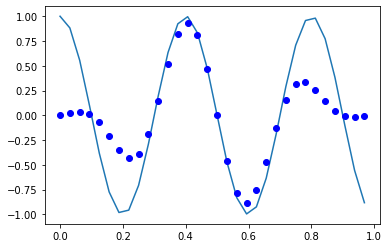

In [181]:
plt.plot( t2 , x_sample )
plt.plot( t2 , x_wn , "bo" )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """Entry point for launching an IPython kernel.


<StemContainer object of 3 artists>

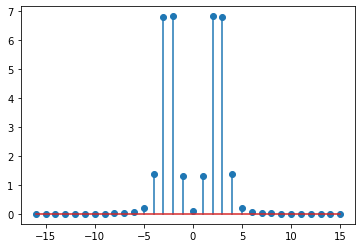

In [182]:
plt.stem( freqs , np.abs( X_wn ) )



In [183]:
from scipy.io.wavfile import read


In [184]:
fs , data = read( "speech_a.wav" )
data = data/max( np.abs( data ) )


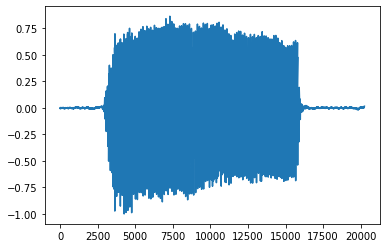

In [185]:
plt.plot( data )

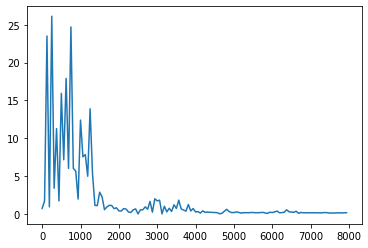

In [186]:
start_sec = 0.6
start_sample = int( start_sec*fs )
nfft = 256
x = data[ start_sample:start_sample+nfft ]
X = fft( x )
freq = fftfreq( len(X) , d=1.0/fs )
plt.plot( freq[:nfft//2] , np.abs(X)[:nfft//2])



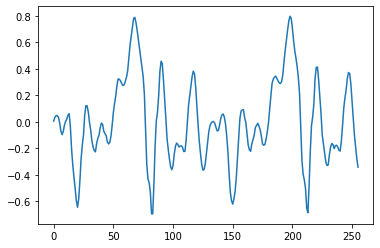

In [187]:
plt.plot( x )

Text(0, 0.5, 'frequency[Hz]')

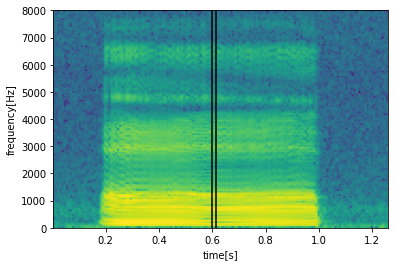

In [188]:
plt.specgram( data , Fs=fs );
plt.vlines( [start_sec , start_sec+nfft/fs ] , 0 , 8000 )
plt.xlabel( "time[s]" )
plt.ylabel( "frequency[Hz]" )


In [190]:
nfft/fs

0.016